# Introduction to Qutrits using Google Cirq

This notebook demonstrates how to work with qutrits (3-level quantum systems) using Google Cirq and the qnlib library. We'll explore Clifford gates for qutrits and see how to create, manipulate, and measure qutrit states.

## Setup
First, we import the required libraries. We use Cirq for quantum circuit manipulation, NumPy for numerical operations, and custom utilities from qnlib for qutrit-specific operations.

In [1]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from qnlib.gates.cliffords.utils import single_qutrit_cliffords
from qnlib.utils.visualization import plot_gate_matrix

## Creating a Qutrit
We create a single qutrit using Cirq's LineQid class. The dimension parameter is set to 3 to represent a 3-level quantum system.

In [2]:
qutrit = cirq.LineQid(0, dimension=3)

## Working with Clifford Gates
We load the predefined set of single-qutrit Clifford gates. These gates form a complete set of operations for qutrit manipulation.

In [3]:
clifford_gates = single_qutrit_cliffords()

## Building Simple Circuits
Let's create a simple circuit using the first Clifford gate (X gate) to see how it acts on our qutrit.

In [4]:
circuit1 = cirq.Circuit()
circuit1.append(clifford_gates.gates[1][0].on(qutrit))
print("X gate:", circuit1)

X gate:             ┌                    ┐
            │0.+0.j 0.+0.j 1.+0.j│
0 (d=3): ───│1.+0.j 0.+0.j 0.+0.j│───
            │0.+0.j 1.+0.j 0.+0.j│
            └                    ┘


## Visualizing Gate Matrices
We can randomly select a Clifford gate and visualize its matrix representation. This helps understand how these gates transform qutrit states.

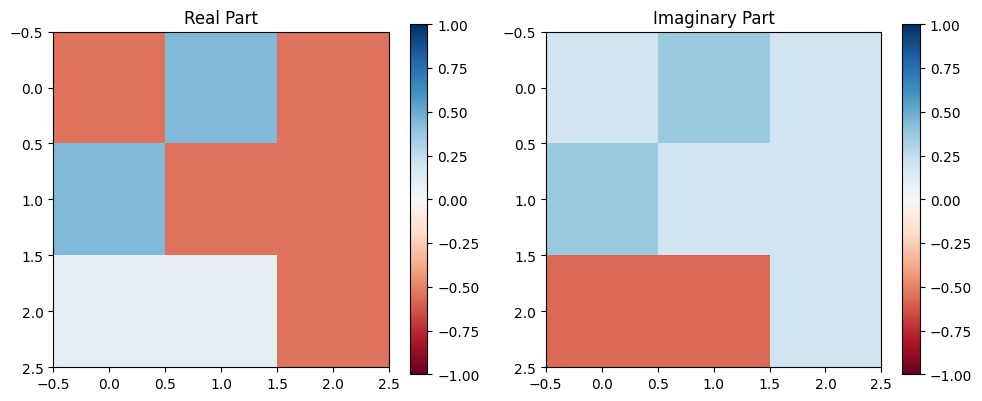

In [5]:
flattened_gates = [gate[0] for gate in clifford_gates.gates]
random_gate = np.random.choice(flattened_gates)
plot_gate_matrix(random_gate)
plt.show()

## Creating and Running Quantum Circuits
Now let's create a more complex circuit with multiple random gates and perform measurements.

In [6]:
simulator = cirq.Simulator()
test_circuit = cirq.Circuit()
random_gates = np.random.choice(flattened_gates, size=3, replace=False)

In [7]:
for gate in random_gates:
    test_circuit.append(gate(qutrit))
test_circuit.append(cirq.measure(qutrit, key="x"))
print(f'\nRandom circuit: {test_circuit}')


Random circuit:             ┌                                      ┐   ┌                                         ┐   ┌                                         ┐
            │0.1  -0.569j 0.1  -0.569j 0.442+0.371j│   │-0.543+0.197j  0.442+0.371j -0.543+0.197j│   │-0.543-0.197j  0.1  +0.569j -0.543-0.197j│
0 (d=3): ───│0.1  -0.569j 0.442+0.371j 0.1  -0.569j│───│ 0.1  -0.569j  0.1  -0.569j -0.543+0.197j│───│ 0.442-0.371j  0.442-0.371j -0.543-0.197j│───M('x')───
            │0.442+0.371j 0.1  -0.569j 0.1  -0.569j│   │ 0.442+0.371j -0.543+0.197j -0.543+0.197j│   │ 0.442-0.371j  0.1  +0.569j  0.1  +0.569j│
            └                                      ┘   └                                         ┘   └                                         ┘


In [8]:
result = simulator.run(test_circuit, repetitions=10)

## Measurement Results
We run the circuit multiple times and analyze the measurement distribution across the three possible states (0, 1, 2).

In [9]:
unique, counts = np.unique(result.measurements['x'], return_counts=True)
print("\nMeasurement distribution:")
for state, count in zip(unique, counts):
    print(f"State {state}: {count}")


Measurement distribution:
State 0: 4
State 1: 2
State 2: 4
